# Using Machine Learning Algorithms - k-Nearest Neighbor (k-NN) for Image Classification

## What is machine learning?

Machine learning is a of computer science that evolved from the study of pattern recognition and computational learning theory in artificial intelligence. Machine learning explores the study and construction of algorithms that can learn from and make predictions on data. Such algorithms operate by building a model from an example training set of input observations in order to make data-driven predictions or decisions expressed as outputs, rather than following strictly static program instructions.

Broadly, there are 3 types of Machine Learning Algorithms:
1. <b> Supervised Learning - </b> This algorithm consist of a target / outcome variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, we generate a function that map inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy on the training data.

2. <b> Unsupervised Learning - </b> In this algorithm, we do not have any target or outcome variable to predict / estimate.  It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention.

3. <b> Reinforcement Learning: </b> Using this algorithm, the machine is trained to make specific decisions. It works this way: the machine is exposed to an environment where it trains itself continually using trial and error. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions.

Some of the commonly used machine learning algorithms are Linear Regression, Logistic Regression, Decision Tree, SVM, Naive Bayes, kNN, K-Means, Random Forest, etc.

### Basic Requirements to run this notebook
This Python notebook shows you how to use machine learning to build a classification model that maps images of single digit numbers to their corresponding numeric representations.

This notebook is adapted from various machine learning tutorials that describes the important machine learning concepts and includes code snippets here.

## What is k-NN?

# k-Nearest Neighbor

<b> Introduction to k-NN </b>

The k-NN algorithm is among the simplest of all machine learning algorithms. In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression where the input consists of the k closest training examples in the feature space.

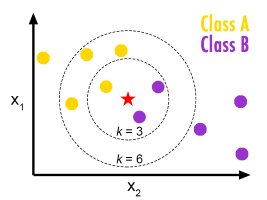


### Installing Python Libraries
Import libraries like sklearn, pandas and numpy that you will be using to run this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
%matplotlib inline

import sklearn as sk
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

## Loading MNIST data set of handwritten digits
MNIST is a database of handwritten numbers.You can also refer to the <a href="http://yann.lecun.com/exdb/mnist/">link</a> to view and read about MNIST datatset. Since MNIST uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.
Run the following cell to get the MNIST data set of images of handwritten numbers:

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
#pixels are in 28*28
28*28

784

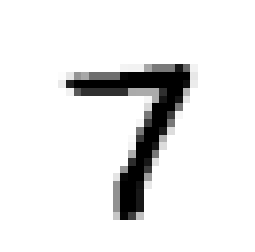

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[46000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
y[46000]

7.0

## Case 1

### Number of Neighbors = 5

In [8]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]

### Shuffling

<b> shuffle_index </b> sequence of indexable data-structures

It is a sequence of shuffled views of the collections. The original indexes/aarays are not impacted.

In [9]:
shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Importing K-Neighbor Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
pred1 = knn.predict(X_test)

## Confusion Matrix

<b> Confusion Matrix </b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In [13]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred1)
confusion_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    2,  978,    1,   14,    1,    7,    4,    0],
       [   3,    6,    1,    0,  959,    0,    4,    2,    1,    6],
       [   5,    0,    0,   11,    2,  866,    4,    1,    2,    1],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    5,    0,    3,    0,    0,  997,    0,    1],
       [   8,    3,    5,   13,    8,   11,    6,    5,  913,    2],
       [  31,   41,   20,   84,  476,   31,   11,  485,   29, 4801]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)

0.90380000000000005

## The accuracy comes upto 90.38%

In [15]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_confusion_matrix = confusion_matrix / row_sums

## Plotting Confusion Matrix

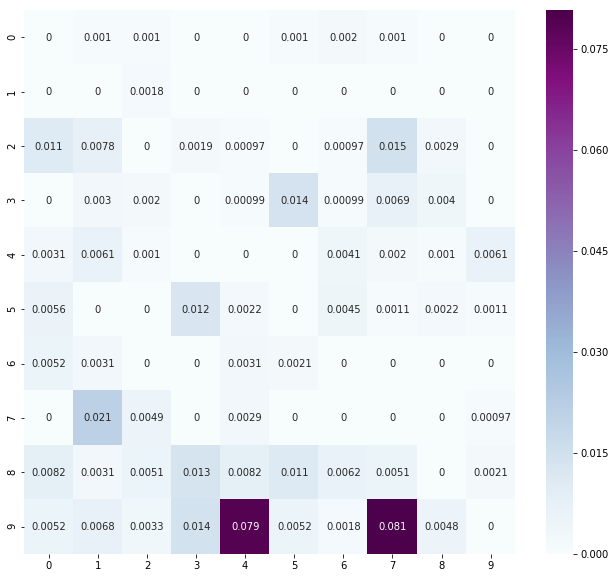

In [16]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
np.fill_diagonal(norm_confusion_matrix, 0)
sns.heatmap(norm_confusion_matrix, annot=True, cmap="BuPu")

## Case 2

### Number of Neighbors = 7

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Importing K-Neighbor Classifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree', leaf_size=40)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [20]:
pred2 = knn.predict(X_test)

## Confusion Matrix

<b> Confusion Matrix </b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In [21]:
from sklearn import metrics
norm_confusion_matrix = metrics.confusion_matrix(y_test, pred2)
norm_confusion_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  988,    2,    1,    0,    2,   16,    4,    0],
       [   0,    3,    2,  976,    1,   13,    1,    8,    5,    1],
       [   1,    8,    1,    0,  960,    0,    5,    1,    1,    5],
       [   5,    0,    0,    7,    2,  871,    4,    1,    2,    0],
       [   6,    3,    0,    0,    3,    2,  944,    0,    0,    0],
       [   0,   24,    3,    0,    1,    0,    0,  999,    0,    1],
       [   6,    4,    6,   11,    7,   13,    1,    6,  918,    2],
       [  12,    8,    2,   15,   68,    4,    1,   74,    5,  820]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)

0.95830000000000004

## The accuracy comes upto 95.83%

In [23]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_confusion_matrix = confusion_matrix / row_sums

## Plotting Confusion Matrix

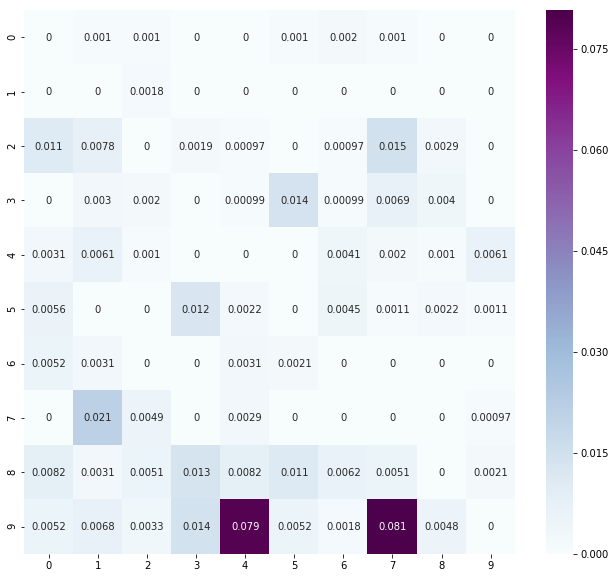

In [24]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
np.fill_diagonal(norm_confusion_matrix, 0)
sns.heatmap(norm_confusion_matrix, annot=True, cmap="BuPu")

## Case 3

### Number of Neighbors = 10

In [25]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Importing K-Neighbor Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, leaf_size=75)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=75, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [28]:
pred3 = knn.predict(X_test)

## Confusion Matrix

<b> Confusion Matrix </b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In [29]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred3)
confusion_matrix

array([[ 972,    1,    1,    0,    0,    2,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  13,   12,  982,    2,    1,    0,    2,   17,    3,    0],
       [   0,    3,    3,  976,    1,   10,    1,    7,    6,    3],
       [   2,   11,    0,    0,  940,    0,    4,    1,    1,   23],
       [   4,    0,    0,   12,    1,  863,    6,    1,    1,    4],
       [   6,    4,    0,    0,    3,    2,  943,    0,    0,    0],
       [   0,   27,    4,    0,    2,    0,    0,  983,    0,   12],
       [   6,    4,    5,   11,    7,    9,    4,    7,  914,    7],
       [   7,    6,    3,    7,   10,    3,    1,   10,    2,  960]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred3)

0.96650000000000003

## The accuracy comes upto 96.65%

In [31]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_confusion_mx = confusion_matrix / row_sums

## Plotting Confusion Matrix

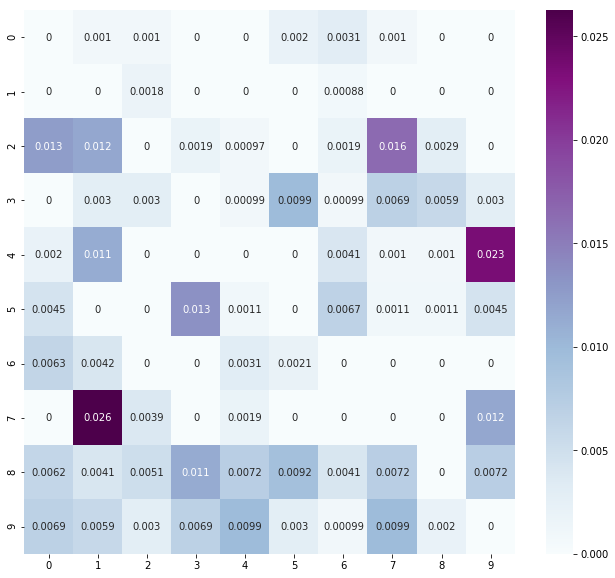

In [32]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
np.fill_diagonal(norm_confusion_mx, 0)
sns.heatmap(norm_confusion_mx, annot=True, cmap="BuPu")

## Looking at all the above cases we can conclude that as the number of neighbors increases, the accuracy of the model increases

# Using Machine Learning Algorithms - Decision Tree for Image Classification

## What is Decision Tree?

<b> Introduction to Decision Tree </b>

A decision tree is a map of the possible outcomes of a series of related choices. It allows an individual or organization to weigh possible actions against one another based on their costs, probabilities, and benefits. They can can be used either to drive informal discussion or to map out an algorithm that predicts the best choice mathematically.

A decision tree typically starts with a single node, which branches into possible outcomes. Each of those outcomes leads to additional nodes, which branch off into other possibilities. This gives it a treelike shape.

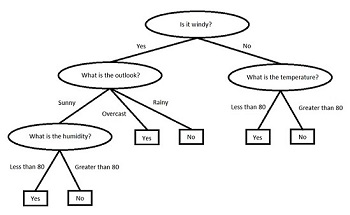

<b> Decision Tree Symbols </b>
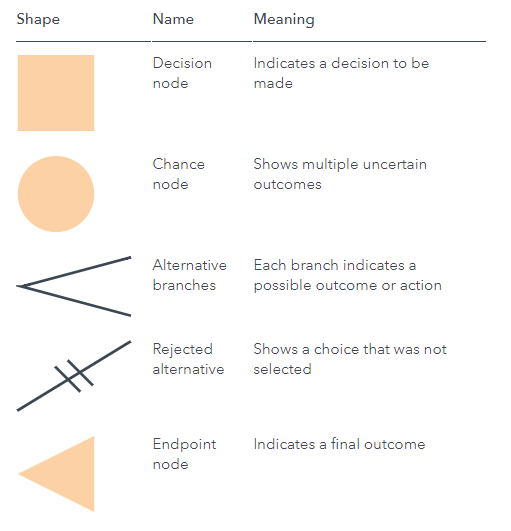

## Case 1

This cases comprises of a single parameter <b> random_state </b> which is set to <b> 42 </b>

In [33]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Importing Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)

In [35]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [36]:
y_pred=dtc.predict(X_test)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85557888,  0.85739287,  0.86362954])

## Confusion Matrix

<b> Confusion Matrix </b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dtc, X_train, y_train, cv=3)
confusion_mx=confusion_matrix(y_train, y_train_pred)
confusion_mx

array([[5416,    7,   51,   60,   37,  105,  109,   23,   76,   39],
       [   3, 6387,   82,   49,   30,   30,   26,   30,   87,   18],
       [  92,   91, 4931,  185,  121,   59,   88,  138,  172,   81],
       [  49,   71,  179, 5034,   51,  277,   48,  109,  204,  109],
       [  36,   41,   88,   36, 4994,   70,   89,   81,   95,  312],
       [  83,   65,   57,  263,   78, 4416,  145,   34,  158,  122],
       [  76,   38,   86,   45,  101,  161, 5231,   11,  133,   36],
       [  24,   39,  144,   90,   86,   38,   10, 5618,   47,  169],
       [  78,  110,  177,  225,  145,  181,   94,   86, 4572,  183],
       [  42,   27,   69,  121,  278,  125,   26,  187,  141, 4933]], dtype=int64)

In [40]:
row_sums = confusion_mx.sum(axis=1, keepdims=True)
norm_confusion_mx = confusion_mx / row_sums

## Plotting

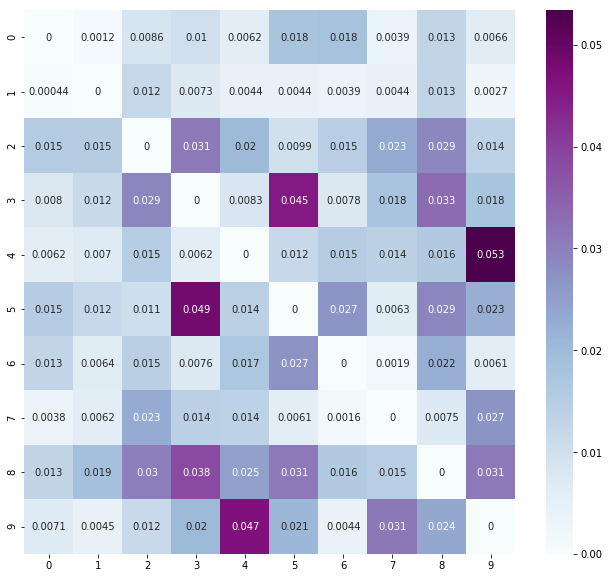

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_confusion_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_confusion_mx, annot=True, cmap="BuPu")

In [42]:
from sklearn.metrics import accuracy_score
y_pred=dtc.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

87.549999999999997

## The accuracy achieved is 87.55%

## Case 2

This cases comprises of multiple parameters. They are as follows:
<b> random_state=42 </b>
<b> min_samples_split=15 </b>
<b> max_depth=15 </b>
<b> min_samples_leaf=10 </b>

In [43]:
X_train, X_test, y_train, y_test = X[:65000], X[65000:], y[:65000], y[65000:]

## Importing Decision Tree Classifier

In [44]:
dtc=DecisionTreeClassifier(random_state=42, min_samples_split=15, max_depth=15, min_samples_leaf=10)

In [45]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [46]:
y_pred=dtc.predict(X_test)

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85754499,  0.85982646,  0.86627585])

## Confusion Matrix

<b> Confusion Matrix </b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dtc, X_train, y_train, cv=3)
confusion_mx=confusion_matrix(y_train, y_train_pred)
confusion_mx

array([[6392,    9,   66,   59,   19,  103,  112,   33,   86,   24],
       [   5, 7526,   86,   61,   31,   40,   27,   46,   42,   13],
       [ 106,   81, 5892,  153,  123,   58,  135,  161,  208,   73],
       [  59,   76,  242, 5926,   65,  283,   59,  105,  218,  108],
       [  46,   47,  103,   35, 5783,   60,   89,   79,  123,  320],
       [ 118,   80,   89,  302,   88, 4346,  115,   41,  153,   89],
       [ 107,   46,  143,   44,  126,  133, 5169,   13,  105,   32],
       [  31,   45,  149,   62,  121,   34,   15, 5584,   70,  154],
       [  63,  174,  236,  205,  134,  151,  128,   46, 4479,  235],
       [  59,   39,   64,  136,  335,  115,   27,  151,  141, 4882]], dtype=int64)

In [49]:
row_sums = confusion_mx.sum(axis=1, keepdims=True)
norm_confusion_mx = confusion_mx / row_sums

## Plotting

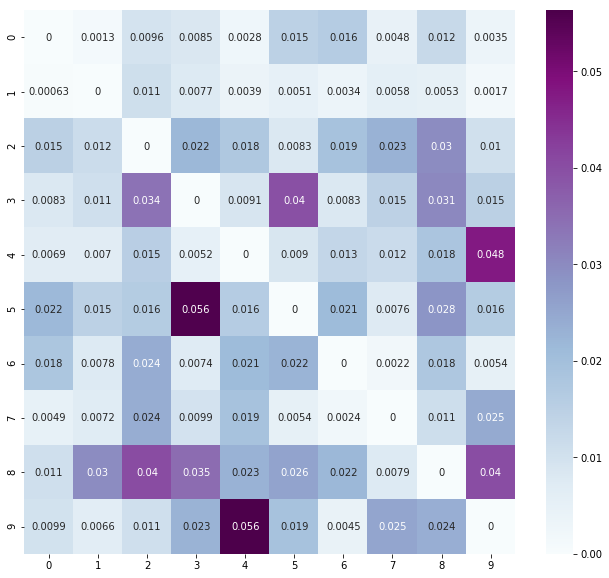

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_confusion_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_confusion_mx, annot=True, cmap="BuPu")

In [52]:
from sklearn.metrics import accuracy_score
y_pred=dtc.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

84.140000000000001

## The accuracy achieved is 84.14%

## From the above observations, we can conclude that case 1 gives better accuracy with just one parameter

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by RADHIKA GATHIA and SHWETA TATIYA is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by RADHIKA GATHIA and SHWETA TATIYA is licensed under the MIT License https://opensource.org/licenses/MIT

## References

In [ ]:
# Dataset 
#http://yann.lecun.com/exdb/mnist/

# References

#https://www.google.com/search?q=decision+tree&source=lnms&tbm=isch&sa=X&ved=0ahUKEwiZyMS1tdHaAhVDs1kKHVz7BdYQ_AUICigB&biw=1366&bih=613#imgrc=sunaxbKAlQ9OoM:
#https://www.youtube.com/watch?v=aZsZrkIgan0
#https://www.youtube.com/watch?v=iQdWX1327XQ
#https://www.lucidchart.com/pages/decision-tree
#https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
#http://www.saedsayad.com/k_nearest_neighbors.htm
#http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/